In [49]:
import pandas as pd
import plotly.express as px
import seaborn as sns
sns.set()
df = pd.read_csv('snaggr_file_no_priceline.csv', index_col=0)
df.dropna(inplace=True)
# Classifying reviews as neutral based on the data I've worked with is quite difficult for the models of this caliber.
# For optimal results, I'm changing the 'Neutral' labels to'Bad'.
# df.loc[df['sentiment'] == 'Neutral', 'sentiment'] = 'Bad'
# Get the value counts of each sentiment
sentiment_counts = df['sentiment'].value_counts()

# # Plot a bar graph
# sentiment_counts.plot(kind='bar', color=['#34cceb', '#e01249', '#8178a2'])

# # Add title and labels
# plt.title('Sentiment Value Counts')
# plt.xlabel('Sentiment')
# plt.ylabel('Counts')

# # Show the plot
# plt.show()




# Assuming `df` is your DataFrame
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']

fig = px.bar(sentiment_counts, x='sentiment', y='count', color='sentiment', color_discrete_map={'Bad': '#e01249', 'Good': '#34cceb', 'Neutral': '#8178a2'})
fig.update_layout(title='Sentiment Counts', xaxis_title='Sentiment', yaxis_title='Count')
fig.show()


C:\Users\deonp\AppData\Local\Temp\ipykernel_28304\963819157.py:5: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



C:\Users\deonp\AppData\Local\Temp\ipykernel_28304\199633891.py:16: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



Epoch 1/100
1969/1969 [==============================] - 153s 76ms/step - loss: 0.7004 - accuracy: 0.7649 - val_loss: 0.5656 - val_accuracy: 0.7964
Epoch 2/100
1969/1969 [==============================] - 137s 69ms/step - loss: 0.5598 - accuracy: 0.7986 - val_loss: 0.5509 - val_accuracy: 0.7954
Epoch 3/100
1969/1969 [==============================] - 106s 54ms/step - loss: 0.5344 - accuracy: 0.8051 - val_loss: 0.5462 - val_accuracy: 0.8028
Epoch 4/100
1969/1969 [==============================] - 87s 44ms/step - loss: 0.5361 - accuracy: 0.8063 - val_loss: 0.5302 - val_accuracy: 0.8021
Epoch 5/100
1969/1969 [==============================] - 87s 44ms/step - loss: 0.5170 - accuracy: 0.8119 - val_loss: 0.5352 - val_accuracy: 0.8053
Epoch 6/100
1969/1969 [==============================] - 87s 44ms/step - loss: 0.5070 - accuracy: 0.8153 - val_loss: 0.5262 - val_accuracy: 0.8077
Epoch 7/100
1969/1969 [==============================] - 90s 46ms/step - loss: 0.4986 - accuracy: 0.8187 - val_loss

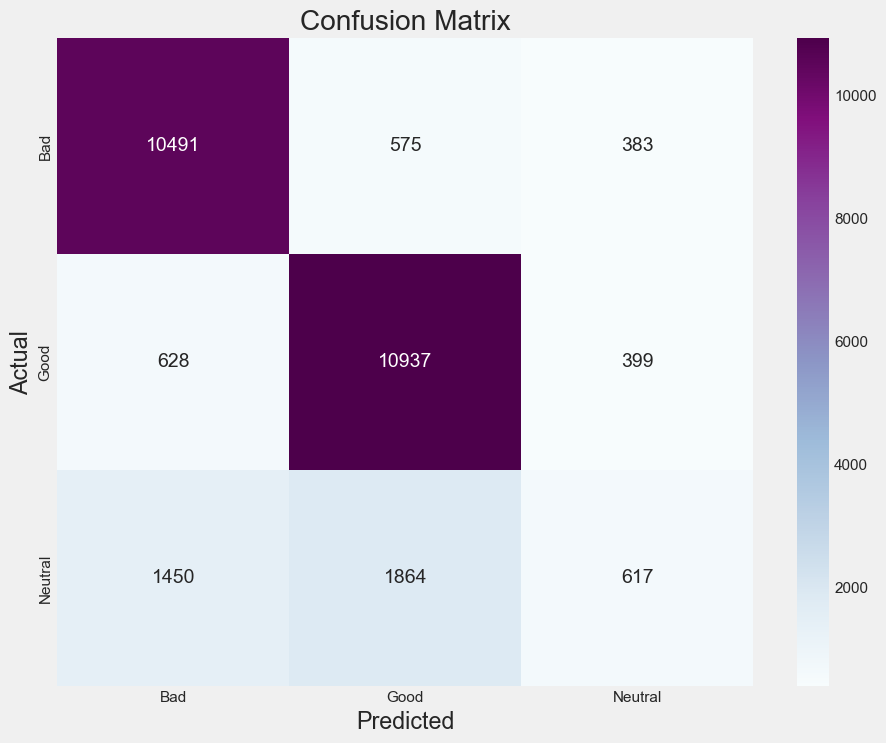

Accuracy: 0.8062097717963721
Classification Report:
               precision    recall  f1-score   support

         Bad       0.83      0.92      0.87     11449
        Good       0.82      0.91      0.86     11964
     Neutral       0.44      0.16      0.23      3931

    accuracy                           0.81     27344
   macro avg       0.70      0.66      0.66     27344
weighted avg       0.77      0.81      0.78     27344



In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the data
df = pd.read_csv('snaggr_file_no_priceline.csv', index_col=0)
df.dropna(inplace=True)

# Tokenize the review texts
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words based on your data
tokenizer.fit_on_texts(df['reviews'])
X = tokenizer.texts_to_sequences(df['reviews'])

# Pad the sequences
X = pad_sequences(X, maxlen=100)  # Adjust maxlen based on your data

# Encode the labels
y = pd.get_dummies(df['sentiment']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=50, input_length=100))  # Adjust input_dim, output_dim, and input_length based on your data
model.add(LSTM(units=50, dropout=0.2, kernel_regularizer=l2(0.01), recurrent_dropout=0.2))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.01)))  

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Predict the sentiments for the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Map the integer labels back to original string labels
label_map = {0: 'Bad', 1: 'Good', 2: 'Neutral'}
y_test_labels = [label_map[label] for label in y_test_classes]
y_pred_labels = [label_map[label] for label in y_pred_classes]

# Generate confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=['Bad', 'Good', 'Neutral'], yticklabels=['Bad', 'Good', 'Neutral'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels, target_names=['Bad', 'Good', 'Neutral']))





In [42]:
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)


plt.figure(figsize = (12, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
epoch = range(1, 9)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

fig = px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',  
        labels={'epoch': 'Epoch', 'value': 'Loss'},
        template = 'plotly_dark')
fig.update_xaxes(title_text='Epoch')
fig.update_yaxes(title_text='Loss')


<Figure size 1200x600 with 0 Axes>

C:\Users\deonp\AppData\Local\Temp\ipykernel_28304\825493893.py:16: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



Epoch 1/10
1539/1539 [==============================] - 179s 115ms/step - loss: 0.4657 - accuracy: 0.8485 - val_loss: 0.3506 - val_accuracy: 0.8773
Epoch 2/10
1539/1539 [==============================] - 271s 176ms/step - loss: 0.3373 - accuracy: 0.8781 - val_loss: 0.3406 - val_accuracy: 0.8678
Epoch 3/10
1539/1539 [==============================] - 299s 194ms/step - loss: 0.3221 - accuracy: 0.8827 - val_loss: 0.3330 - val_accuracy: 0.8759
Epoch 4/10
1539/1539 [==============================] - 224s 145ms/step - loss: 0.3090 - accuracy: 0.8854 - val_loss: 0.3177 - val_accuracy: 0.8779
Epoch 5/10
1539/1539 [==============================] - 240s 156ms/step - loss: 0.3059 - accuracy: 0.8864 - val_loss: 0.3202 - val_accuracy: 0.8770
Epoch 6/10
1539/1539 [==============================] - 231s 150ms/step - loss: 0.2951 - accuracy: 0.8886 - val_loss: 0.3088 - val_accuracy: 0.8793
Epoch 7/10
1539/1539 [==============================] - 164s 107ms/step - loss: 0.2931 - accuracy: 0.8902 - val_

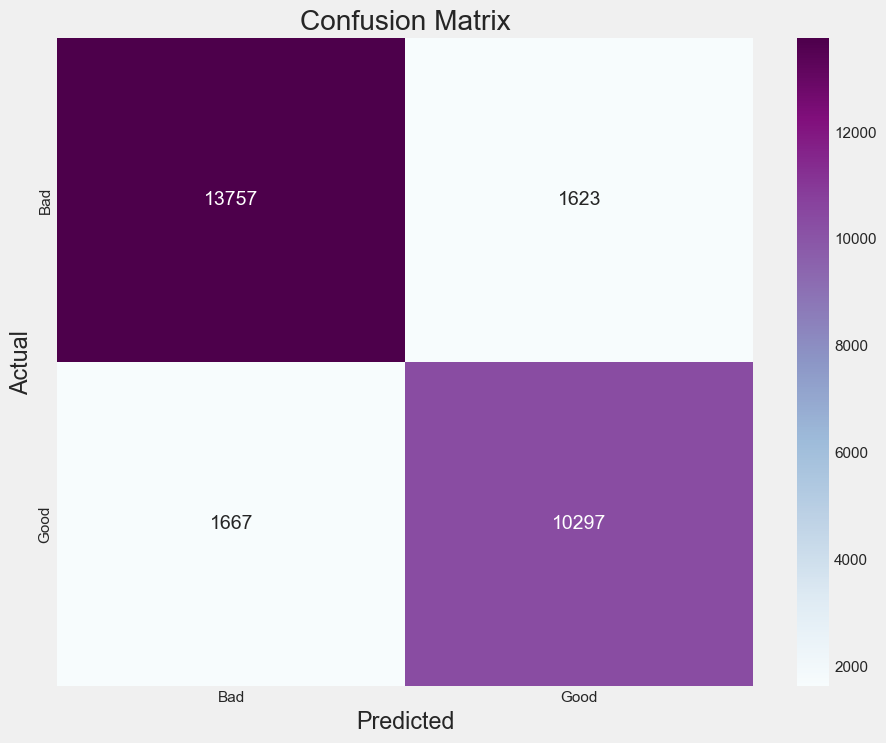

Accuracy: 0.8796811000585137
Classification Report:
               precision    recall  f1-score   support

         Bad       0.89      0.89      0.89     15380
        Good       0.86      0.86      0.86     11964

    accuracy                           0.88     27344
   macro avg       0.88      0.88      0.88     27344
weighted avg       0.88      0.88      0.88     27344



In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the data
df = pd.read_csv('snaggr_file_no_priceline.csv', index_col=0)
df.dropna(inplace=True)

# Replace 'Neutral' with 'Bad'
df.loc[df['sentiment'] == 'Neutral', 'sentiment'] = 'Bad'

# Tokenize the review texts
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words based on your data
tokenizer.fit_on_texts(df['reviews'])
X = tokenizer.texts_to_sequences(df['reviews'])

# Pad the sequences
X = pad_sequences(X, maxlen=100)  # Adjust maxlen based on your data

# Encode the labels
y = pd.get_dummies(df['sentiment']).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=64, input_length=100))  # Adjust input_dim, output_dim, and input_length based on your data
model.add(LSTM(units=64, dropout=0.2, kernel_regularizer=l2(0.01), recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax', kernel_regularizer=l2(0.01)))  

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
# Control when the model stops training
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, callbacks=[early_stopping], verbose=1)

# Predict the sentiments for the test data
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)
# <---------------------------------------------------------END OF TRAIN/TEST CODE-------------------------------------------->



# Map the integer labels back to original string labels
label_map = {0: 'Bad', 1: 'Good'}
y_test_labels = [label_map[label] for label in y_test_classes]
y_pred_labels = [label_map[label] for label in y_pred_classes]
# Generate confusion matrix
conf_mat = confusion_matrix(y_test_classes, y_pred_classes)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='BuPu', xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy:", accuracy_score(y_test_classes, y_pred_classes))
print("Classification Report:\n", classification_report(y_test_labels, y_pred_labels))

# # Save the model
# model.save('snaggr_rnn_model.h5')

In [48]:
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)


plt.figure(figsize = (12, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss'] 
epoch = range(1, 9)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

fig = px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',  
        labels={'epoch': 'Epoch', 'value': 'Loss'},
        template = 'plotly_dark')
fig.update_xaxes(title_text='Epoch')
fig.update_yaxes(title_text='Loss')

<Figure size 1200x600 with 0 Axes>